### Importing necessary modules

In [1]:
!pip install colour-science

In [2]:
# importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd # for reading csv files

# for plotting chromatic diagram
import colour
from colour.plotting import *

### Displaying the image

(512, 910, 3)


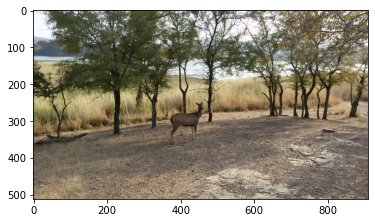

In [3]:
img_deer = img.imread('Deer.jpg')
# displaying the shape of the image
print(img_deer.shape)
# displaying the modified image
plt.imshow(img_deer)

(512, 910, 3)


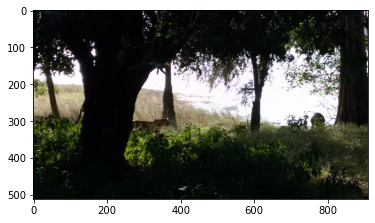

In [4]:
img_tiger = img.imread('Tiger.jpg')
# displaying the shape of the image
print(img_tiger.shape)
# displaying the modified image
plt.imshow(img_tiger)

### Convert image to hsv image

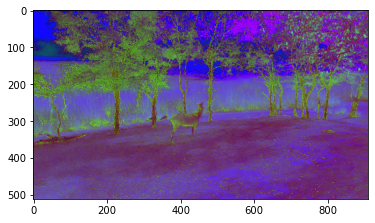

In [5]:
hsvImg1 = cv2.cvtColor(img_deer, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg1)

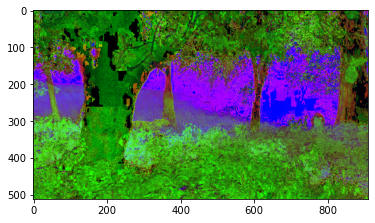

In [6]:
hsvImg2 = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg2)

In [7]:
# img = cv2.imread('Deer.jpg')
# hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# plt.imshow('RGB image', img)
# cv2.imshow('HSV image', hsvImg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Maximally Saturated Image

In [8]:
def maxSat(img):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # making saturation value maximum
    max_sat_img[:,:,1] = 255
    # convert back to rgb image for displaying
    color_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2BGR)
    return color_img
    

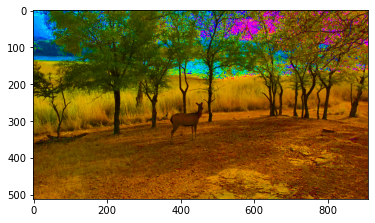

In [9]:
plt.imshow(maxSat(img_deer))


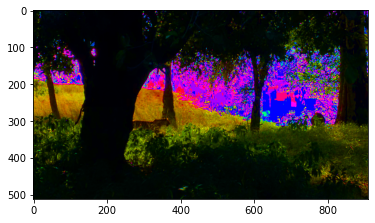

In [10]:
plt.imshow(maxSat(img_tiger))

## Desaturated Image 

In [11]:
def deSat(img, val):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # increase the value of saturation by some quantity
    if val> 255:
        print("Max pixel value is 255")
    max_sat_img[:,:,1] = max_sat_img[:,:,1] + val
    # convert back to bgr image for displaying
    de_sat_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2BGR)
    return de_sat_img

Enter the pixel value(value should be less than 255):66


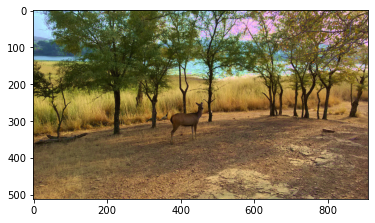

In [12]:
val = int(input("Enter the pixel value(value should be less than 255):"))
plt.imshow(deSat(img_deer,val))

In [13]:
# cv2.imshow('Desaturated Image', deSat(img,100))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Enter the pixel value(value should be less than 255):88


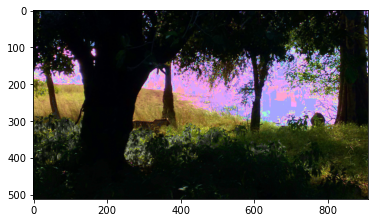

In [14]:
val = int(input("Enter the pixel value(value should be less than 255):"))
plt.imshow(deSat(img_tiger,val))

## Saturated Desaturated Image

In [15]:
def satdeSat(img, val1,val2):
    # convert it to hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    max_sat_img = hsv_img
    # increase the value pf saturation by a quantity
    # decrease it by some other quantity
    max_sat_img[:,:,1] = max_sat_img[:,:,1] + val1 - val2
    max_sat_img = cv2.cvtColor(max_sat_img, cv2.COLOR_HSV2RGB)
    return max_sat_img

Enter the  pixel value to increase:88
Enter the  pixel value to decrease:99


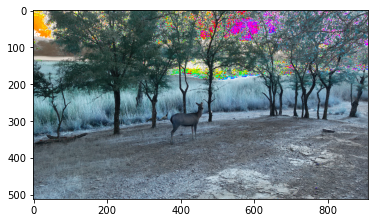

In [16]:
val1 = int(input("Enter the  pixel value to increase:"))
val2 = int(input("Enter the  pixel value to decrease:"))

plt.imshow(satdeSat(img_deer,val1,val2))

Enter the  pixel value to increase:77
Enter the  pixel value to decrease:54


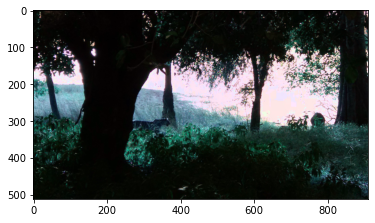

In [18]:
val3 = int(input("Enter the  pixel value to increase:"))
val4 = int(input("Enter the  pixel value to decrease:"))

plt.imshow(satdeSat(img_tiger,val3,val4))

# Showing chromaticity plots

### Calculating xy values from xyz image

In [19]:
def img_to_rgb_matrix(img_rgb):
    
    m, n, c = img_rgb.shape
    img_rgb = img_rgb / 255
    rgb_array = np.array([img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]]).reshape(c, m*n)
    
    return rgb_array

def rgb_matrix_to_img_rgb(rgb, m, n):
    
    rgb = rgb * 255
    rgb = rgb.astype('uint8')
    
    rgb = rgb.reshape(3, m, n)
    img_rgb = np.dstack((rgb[0], rgb[1], rgb[2]))
    
    return img_rgb 

def rgb_to_xyz(rgb_array):
    
    conv_mat = np.array([
        [0.6067, 0.1736, 0.2001],
        [0.2988, 0.5868, 0.1143],
        [0.0000, 0.0661, 1.1149]
    ])
    
    xyz_array = np.matmul(conv_mat, rgb_array)
    
    return xyz_array


def get_2D_chromatics(img):
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    rgb_array = img_to_rgb_matrix(img_rgb)
    xyz_array = rgb_to_xyz(rgb_array)
    
    xyz_array = xyz_array.transpose()
    for i in range(xyz_array.shape[0]):
        summ = np.sum(xyz_array[i])
        xyz_array[i][0] /= summ
        xyz_array[i][1] /= summ
    xy_array = xyz_array.transpose()[:-1,:] 
    
    return xy_array

In [20]:
arr_xy = get_2D_chromatics(img_deer)

C:\Users\hp\AppData\Local\Temp\ipykernel_16992\1997064889.py:42: RuntimeWarning: invalid value encountered in double_scalars
  xyz_array[i][0] /= summ
C:\Users\hp\AppData\Local\Temp\ipykernel_16992\1997064889.py:43: RuntimeWarning: invalid value encountered in double_scalars
  xyz_array[i][1] /= summ


In [21]:
arr_xy

array([[ 0.31342543,  0.31299164,  0.31341223, ...,  0.28107317,
         0.2751537 ,  0.27870151],
       [ 0.31975891,  0.31971958,  0.31974505, ...,  0.29111789,
         0.29234432,  0.29695637]])

### Reading data from csv file

In [22]:
# Give the location of the file
df = pd.read_csv("ciexyz31_1.csv")

df.head()

,360,0.000129900000,0.000003917000,0.000606100000
0,361,0.000146,0.000004,0.000681
1,362,0.000164,0.000005,0.000765
2,363,0.000184,0.000006,0.000860
3,364,0.000207,0.000006,0.000967
4,365,0.000232,0.000007,0.001086


In [23]:
df.columns = ['wavelength','x','y','z']
df_new = df[["x","y","z"]]
rgb_arr = df_new.to_numpy()

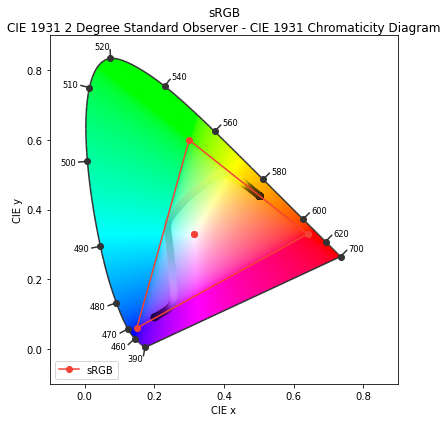

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [24]:
RGB = colour.models.eotf_inverse_sRGB(rgb_arr)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB)
